## [Computational Social Science] Project 5: Natural Language Processing

### part 1: data cleaning

In [62]:
###' ################################################################################
###'
###' IMPORT LIBRARIES
###'
###'

### pandas and numpy
import pandas as pd
import numpy as numpy
import matplotlib.pyplot as plt

### punctuation, stop words and English language model
from string import punctuation
from spacy.lang.en.stop_words import STOP_WORDS
from spellchecker import SpellChecker
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
import en_core_web_sm
nlp = en_core_web_sm.load()
import scattertext as st

### textblob
from textblob import TextBlob

### countvectorizer, tfidfvectorizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

### gensim
import gensim
from gensim import models

### plotting
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### kMeans and silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

### ignore warnings
import warnings
warnings.filterwarnings('ignore')

###time
from datetime import datetime

In [63]:
###' ################################################################################
###'
###' Data Load 
###'
###'

### data load
congress_tweets = pd.read_csv("data/116th Congressional Tweets and Demographics.csv")


### confirm generated data
congress_tweets.head(n=5)

,tweet_id,screen_name,datetime,text,name_wikipedia,position,joined_congress_date,birthday,gender,state,district_number,party,trump_2016_state_share,clinton_2016_state_share,obama_2012_state_share,romney_2012_state_share
0,1.081010e+18,RepByrne,2019-01-03T21:23:00-05:00,Great news for Baldwin County! The economy of ...,Bradley Byrne,Rep,8-Jan-14,2/16/1955,M,AL,1,Republican,"1,318,255","729,547","795,696","1,255,925"
1,1.080880e+18,RepByrne,2019-01-03T12:30:38-05:00,Outstanding news today from @Airbus! @JetBlue ...,Bradley Byrne,Rep,8-Jan-14,2/16/1955,M,AL,1,Republican,"1,318,255","729,547","795,696","1,255,925"
2,1.080830e+18,RepByrne,2019-01-03T09:12:07-05:00,RT @senatemajldr Democrats will have to get se...,Bradley Byrne,Rep,8-Jan-14,2/16/1955,M,AL,1,Republican,"1,318,255","729,547","795,696","1,255,925"
3,1.080890e+18,RepByrne,2019-01-03T13:20:53-05:00,Here is a sign of things to come: As Democrats...,Bradley Byrne,Rep,8-Jan-14,2/16/1955,M,AL,1,Republican,"1,318,255","729,547","795,696","1,255,925"
4,1.080870e+18,RepByrne,2019-01-03T12:10:26-05:00,Let's understand what we're dealing with here:...,Bradley Byrne,Rep,8-Jan-14,2/16/1955,M,AL,1,Republican,"1,318,255","729,547","795,696","1,255,925"


In [64]:
###' ################################################################################
###'
###' Data Generation
###'
###'

### create age column
congress_tweets['date'] = congress_tweets['datetime'].str[:10]
congress_tweets['birthday'] = pd.to_datetime(congress_tweets['birthday'])
congress_tweets['age'] = pd.to_numeric(congress_tweets['date'].str[:4]) - congress_tweets['birthday'].dt.year


### confirm generated data
congress_tweets.head(n=5)

,tweet_id,screen_name,datetime,text,name_wikipedia,position,joined_congress_date,birthday,gender,state,district_number,party,trump_2016_state_share,clinton_2016_state_share,obama_2012_state_share,romney_2012_state_share,date,age
0,1.081010e+18,RepByrne,2019-01-03T21:23:00-05:00,Great news for Baldwin County! The economy of ...,Bradley Byrne,Rep,8-Jan-14,1955-02-16,M,AL,1,Republican,"1,318,255","729,547","795,696","1,255,925",2019-01-03,64
1,1.080880e+18,RepByrne,2019-01-03T12:30:38-05:00,Outstanding news today from @Airbus! @JetBlue ...,Bradley Byrne,Rep,8-Jan-14,1955-02-16,M,AL,1,Republican,"1,318,255","729,547","795,696","1,255,925",2019-01-03,64
2,1.080830e+18,RepByrne,2019-01-03T09:12:07-05:00,RT @senatemajldr Democrats will have to get se...,Bradley Byrne,Rep,8-Jan-14,1955-02-16,M,AL,1,Republican,"1,318,255","729,547","795,696","1,255,925",2019-01-03,64
3,1.080890e+18,RepByrne,2019-01-03T13:20:53-05:00,Here is a sign of things to come: As Democrats...,Bradley Byrne,Rep,8-Jan-14,1955-02-16,M,AL,1,Republican,"1,318,255","729,547","795,696","1,255,925",2019-01-03,64
4,1.080870e+18,RepByrne,2019-01-03T12:10:26-05:00,Let's understand what we're dealing with here:...,Bradley Byrne,Rep,8-Jan-14,1955-02-16,M,AL,1,Republican,"1,318,255","729,547","795,696","1,255,925",2019-01-03,64


In [65]:
###' ################################################################################
###'
###' Sellect Data
###'
###'

### select columns
congress_tweets_sel = congress_tweets[['tweet_id','party','position','gender','age','text']]

### drop NAs in text column
congress_tweets_sel = congress_tweets_sel.dropna(subset = ['text'])



###' ################################################################################
###'
###' Devide Data by Subsets
###'
###'

### devide data by party
RE_tweets = congress_tweets_sel[congress_tweets_sel['party']=='Republican']
DE_tweets = congress_tweets_sel[congress_tweets_sel['party']=='Democrat']
IN_tweets = congress_tweets_sel[congress_tweets_sel['party']=='Independent']


### devide data by position
REP_tweets = congress_tweets_sel[congress_tweets_sel['position']=='Rep']
SEN_tweets = congress_tweets_sel[congress_tweets_sel['position']=='Sen']

In [66]:
###' ################################################################################
###'
###' Random Sample
###'
###'

### set seed
numpy.random.seed(1234)


### ramdom sample in whole data 
congress_tweets_part = congress_tweets_sel.sample(n=3000).reset_index(drop=True)


### ramdom sample by party
RE_tweets_part = RE_tweets.sample(n=3000).reset_index(drop=True)
DE_tweets_part = DE_tweets.sample(n=3000).reset_index(drop=True)
IN_tweets_part = IN_tweets.sample(n=3000).reset_index(drop=True)


### random sample by position
REP_tweets_part = REP_tweets.sample(n=3000).reset_index(drop=True)
SEN_tweets_part = SEN_tweets.sample(n=3000).reset_index(drop=True)


### confirm generated data
RE_tweets_part.head(n=5)

,tweet_id,party,position,gender,age,text
0,1.123280e+18,Republican,Sen,M,83,Happy Trails! https://twitter.com/KansasWheat/...
1,1.151920e+18,Republican,Rep,M,66,All the young people being honored with the Pr...
2,1.253700e+18,Republican,Rep,M,48,Colleges &amp; universities with billion dolla...
3,1.164920e+18,Republican,Rep,M,38,RT @UWCarbone We welcomed @RepBryanSteil today...
4,1.289190e+18,Republican,Rep,M,44,RT @DougBurgum Today's ND Supreme Court opinio...


In [67]:
###' ################################################################################
###'
###' Spell check for Random Sampled Text
###'
###'

### load spell checker
spell = SpellChecker()


### text spell check
congress_tweets_part['text_spell'] = congress_tweets_part['text'].map(lambda x: spell.correction(x))

RE_tweets_part['text_spell'] = RE_tweets_part['text'].map(lambda x: spell.correction(x))
DE_tweets_part['text_spell'] = DE_tweets_part['text'].map(lambda x: spell.correction(x))
IN_tweets_part['text_spell'] = IN_tweets_part['text'].map(lambda x: spell.correction(x))
    
REP_tweets_part['text_spell'] = REP_tweets_part['text'].map(lambda x: spell.correction(x))
SEN_tweets_part['text_spell'] = SEN_tweets_part['text'].map(lambda x: spell.correction(x))


### confirm generated data
RE_tweets_part.head(n=10)

,tweet_id,party,position,gender,age,text,text_spell
0,1.123280e+18,Republican,Sen,M,83,Happy Trails! https://twitter.com/KansasWheat/...,Happy Trails! https://twitter.com/KansasWheat/...
1,1.151920e+18,Republican,Rep,M,66,All the young people being honored with the Pr...,All the young people being honored with the Pr...
2,1.253700e+18,Republican,Rep,M,48,Colleges &amp; universities with billion dolla...,Colleges &amp; universities with billion dolla...
3,1.164920e+18,Republican,Rep,M,38,RT @UWCarbone We welcomed @RepBryanSteil today...,RT @UWCarbone We welcomed @RepBryanSteil today...
4,1.289190e+18,Republican,Rep,M,44,RT @DougBurgum Today's ND Supreme Court opinio...,RT @DougBurgum Today's ND Supreme Court opinio...
5,1.246600e+18,Republican,Sen,M,71,Thanks to @JobCreatorsUSA for helping spread t...,Thanks to @JobCreatorsUSA for helping spread t...
6,1.222910e+18,Republican,Sen,M,69,Reports of Bolton’s book don't answer the ques...,Reports of Bolton’s book don't answer the ques...
7,1.113160e+18,Republican,Rep,M,65,RT @realDonaldTrump “I haven’t seen any Democr...,RT @realDonaldTrump “I haven’t seen any Democr...
8,1.118260e+18,Republican,Rep,M,62,"RT @RepDustyJohnson In a down moment, getting ...","RT @RepDustyJohnson In a down moment, getting ..."
9,1.295770e+18,Republican,Rep,M,48,"Heads up, #TX21 \n\n""Fraudulent letters threat...","Heads up, #TX21 \n\n""Fraudulent letters threat..."


In [68]:
###' ################################################################################
###'
###' Function for Deleteing Punctuations and StopWords
###'
###'

### define fuction
def rem_punc_stop(text):
    
    # when text is None
    if text is None:  
        return None
    
    # add more stop words
    stop_words = STOP_WORDS 
    nlp.Defaults.stop_words |= {"monday", "tuesday", "wednesday", "thursday", "friday", "saturday", "sunday",
                    "january", "february", "march", "april", "may", "june", "july", "august", "september", 
                    "october", "november", "december", "time", "today", "yesterday", "tomorrow", 
                    "day", "week", "month", "year","amp","RT","QT"}
    
    punc = set(punctuation)
    
    
    # remove the punctuation
    punc_free = "".join([ch for ch in text if ch not in punc])                                                               

    # apply nlp to punctuation-free object
    doc = nlp(punc_free)
    
    # lemmatize
    text_lemma = " ".join([word.lemma_ for word in doc])
    
    # extract words from processed text 
    spacy_words = text_lemma.split()
    spacy_words_1 = [word for word in spacy_words if not word.startswith("@")]
    spacy_words_2 = [word for word in spacy_words_1 if not word.startswith("http")]
    
    
    # filter out words 
    no_stop = [word for word in spacy_words_2 if word not in stop_words]
    
    # return
    return no_stop

In [69]:
###' ################################################################################
###'
###' Apply the Function and Tokenize Text Column
###'
###'

### sample from the whole dataset
congress_tweets_part['tokens'] = congress_tweets_part['text_spell'].map(lambda x: rem_punc_stop(x))


### sample by party
RE_tweets_part['tokens'] = RE_tweets_part['text_spell'].map(lambda x: rem_punc_stop(x))
DE_tweets_part['tokens'] = DE_tweets_part['text_spell'].map(lambda x: rem_punc_stop(x))
IN_tweets_part['tokens'] = IN_tweets_part['text_spell'].map(lambda x: rem_punc_stop(x))


### sample by position
REP_tweets_part['tokens'] = REP_tweets_part['text_spell'].map(lambda x: rem_punc_stop(x))
SEN_tweets_part['tokens'] = SEN_tweets_part['text_spell'].map(lambda x: rem_punc_stop(x))


### confirm generated data
RE_tweets_part['tokens']

0       [Happy, Trails, KansasWheat, wheattour19, kick...
1       [young, people, honor, Presidential, Scholar, ...
2       [college, university, billion, dollar, endowme...
3       [UWCarbone, welcome, RepBryanSteil, learn, cut...
4       [DougBurgum, Todays, ND, Supreme, Court, opini...
                              ...                        
2995    [GovMattBevin, unmanned, package, delivery, as...
2996    [CentreCounty, attend, tonight, wildlife, Ever...
2997    [Judge, Barrett, impeccable, credential, quali...
2998    [Democrats, act, stop, influx, criminal, illeg...
2999    [50, ago, Neil, Armstrong, TheRealBuzz, astrom...
Name: tokens, Length: 3000, dtype: object

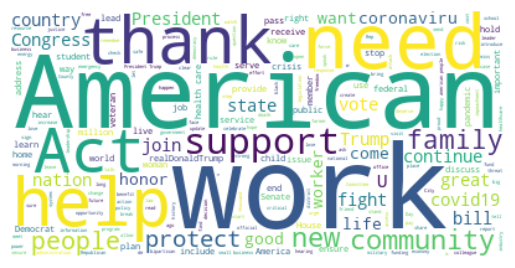

In [70]:
###' ################################################################################
###'
###' VISUALIZATION : Word Cloud
###' by. party
###'
###'

### 0. Sample from Whole data

# apply function to text object
TO_text = ' '.join(congress_tweets_part['tokens'].map(lambda text: ' '.join(text) if isinstance(text, list) else ""))

# create WordCloud visualization using the "text" object 
TO_wordcloud = WordCloud(background_color = "white",
                      random_state=41              
                      ).generate(TO_text)          

# plot 
plt.imshow(TO_wordcloud,
           interpolation = 'bilinear')
plt.axis('off')                       
plt.show()                            

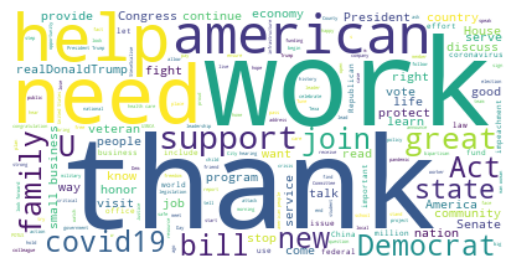

In [71]:
### 1. REPUBLIC

# apply function to text object
RE_text = ' '.join(RE_tweets_part['tokens'].map(lambda text: ' '.join(text) if isinstance(text, list) else ""))

# create WordCloud visualization using the "text" object 
RE_wordcloud = WordCloud(background_color = "white",
                      random_state=41              
                      ).generate(RE_text)          

# plot 
plt.imshow(RE_wordcloud,
           interpolation = 'bilinear')
plt.axis('off')                       
plt.show()   

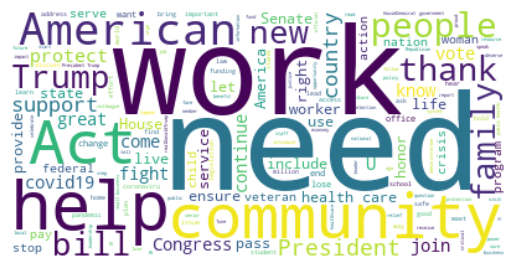

In [72]:
### 2. DEMOCRAT

# apply function to text object
DE_text = ' '.join(DE_tweets_part['tokens'].map(lambda text: ' '.join(text) if isinstance(text, list) else ""))

# create WordCloud visualization using the "text" object 
DE_wordcloud = WordCloud(background_color = "white",
                      random_state=41              
                      ).generate(DE_text)         

# plot 
plt.imshow(DE_wordcloud,                
           interpolation = 'bilinear') 
plt.axis('off')                        
plt.show()                             

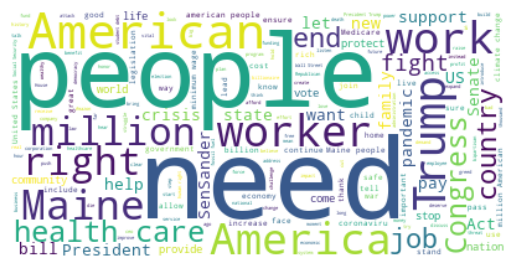

In [73]:
### 3. INDEPENDENT

# apply function to text object
IN_text = ' '.join(IN_tweets_part['tokens'].map(lambda text: ' '.join(text) if isinstance(text, list) else ""))

# create WordCloud visualization using the "text" object 
IN_wordcloud = WordCloud(background_color = "white",
                      random_state=41              
                      ).generate(IN_text)          

# plot 
plt.imshow(IN_wordcloud,               
           interpolation = 'bilinear') 
plt.axis('off')                        
plt.show()                             

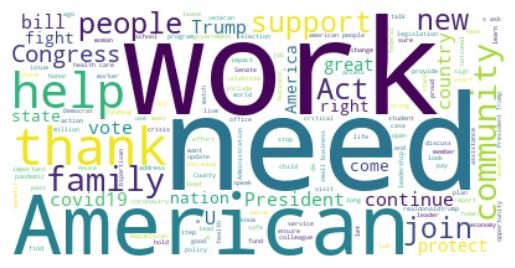

In [74]:
###' ################################################################################
###'
###' VISUALIZATION : Word Cloud
###' by. position
###'
###'

### 1. REPRESENTITIVE

# apply function to text object
REP_text = ' '.join(REP_tweets_part['tokens'].map(lambda text: ' '.join(text) if isinstance(text, list) else ""))

# create WordCloud visualization using the "text" object 
REP_wordcloud = WordCloud(background_color = "white",
                      random_state=41              
                      ).generate(REP_text)         

# plot 
plt.imshow(REP_wordcloud,             
           interpolation = 'bilinear')
plt.axis('off')                       
plt.show()                            

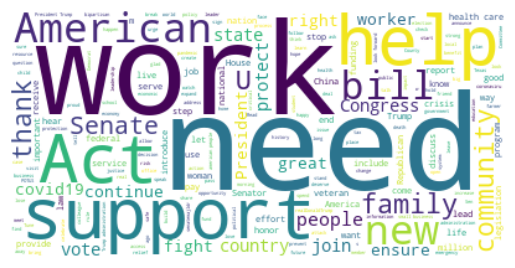

In [75]:
### 2. SENATOR

# apply function to text object
SEN_text = ' '.join(SEN_tweets_part['tokens'].map(lambda text: ' '.join(text) if isinstance(text, list) else ""))

# create WordCloud visualization using the "text" object 
SEN_wordcloud = WordCloud(background_color = "white",
                      random_state=41              
                      ).generate(SEN_text)         

# plot 
plt.imshow(SEN_wordcloud,              
           interpolation = 'bilinear') 
plt.axis('off')                        
plt.show()                             

In [76]:
###' ################################################################################
###'
###' GENERATE TEXT FEATURES
###' e.g. text_len, word count, polarity, subjectivity
###'
###'

### by PARTY

# text_len
RE_tweets_part['text_len'] = RE_tweets_part['text_spell'].dropna().apply(len)
DE_tweets_part['text_len'] = DE_tweets_part['text_spell'].dropna().apply(len)
IN_tweets_part['text_len'] = IN_tweets_part['text_spell'].dropna().apply(len)

# word count
RE_tweets_part['word_count'] = RE_tweets_part['text_spell'].dropna().apply(lambda x: len(str(x).split()))
DE_tweets_part['word_count'] = DE_tweets_part['text_spell'].dropna().apply(lambda x: len(str(x).split()))
IN_tweets_part['word_count'] = IN_tweets_part['text_spell'].dropna().apply(lambda x: len(str(x).split()))

# join token
RE_tweets_part['tokens_join'] = RE_tweets_part['tokens'].map(lambda text: ' '.join(text) if isinstance(text, list) else "")
DE_tweets_part['tokens_join'] = DE_tweets_part['tokens'].map(lambda text: ' '.join(text) if isinstance(text, list) else "")
IN_tweets_part['tokens_join'] = IN_tweets_part['tokens'].map(lambda text: ' '.join(text) if isinstance(text, list) else "")

# polarity
RE_tweets_part['polarity'] = RE_tweets_part['tokens_join'].map(lambda text: TextBlob(text).sentiment.polarity)
DE_tweets_part['polarity'] = DE_tweets_part['tokens_join'].map(lambda text: TextBlob(text).sentiment.polarity)
IN_tweets_part['polarity'] = IN_tweets_part['tokens_join'].map(lambda text: TextBlob(text).sentiment.polarity)

# subjectivity
RE_tweets_part['subjectivity'] = RE_tweets_part['tokens_join'].map(lambda text: TextBlob(text).sentiment.subjectivity)
DE_tweets_part['subjectivity'] = DE_tweets_part['tokens_join'].map(lambda text: TextBlob(text).sentiment.subjectivity)
IN_tweets_part['subjectivity'] = IN_tweets_part['tokens_join'].map(lambda text: TextBlob(text).sentiment.subjectivity)



### by POSITION

# text_len
REP_tweets_part['text_len'] = REP_tweets_part['text_spell'].dropna().apply(len)
SEN_tweets_part['text_len'] = SEN_tweets_part['text_spell'].dropna().apply(len)

# word count
REP_tweets_part['word_count'] = REP_tweets_part['text_spell'].dropna().apply(lambda x: len(str(x).split()))
SEN_tweets_part['word_count'] = SEN_tweets_part['text_spell'].dropna().apply(lambda x: len(str(x).split()))

# join token
REP_tweets_part['tokens_join'] = REP_tweets_part['tokens'].map(lambda text: ' '.join(text) if isinstance(text, list) else "")
SEN_tweets_part['tokens_join'] = SEN_tweets_part['tokens'].map(lambda text: ' '.join(text) if isinstance(text, list) else "")

# polarity
REP_tweets_part['polarity'] = REP_tweets_part['tokens_join'].map(lambda text: TextBlob(text).sentiment.polarity)
SEN_tweets_part['polarity'] = SEN_tweets_part['tokens_join'].map(lambda text: TextBlob(text).sentiment.polarity)

# subjectivity
REP_tweets_part['subjectivity'] = REP_tweets_part['tokens_join'].map(lambda text: TextBlob(text).sentiment.subjectivity)
SEN_tweets_part['subjectivity'] = SEN_tweets_part['tokens_join'].map(lambda text: TextBlob(text).sentiment.subjectivity)


### confirm generated data
RE_tweets_part.head(n=5)

,tweet_id,party,position,gender,age,text,text_spell,tokens,text_len,word_count,tokens_join,polarity,subjectivity
0,1.123280e+18,Republican,Sen,M,83,Happy Trails! https://twitter.com/KansasWheat/...,Happy Trails! https://twitter.com/KansasWheat/...,"[Happy, Trails, KansasWheat, wheattour19, kick...",269.0,27.0,Happy Trails KansasWheat wheattour19 kick Manh...,0.800000,1.000000
1,1.151920e+18,Republican,Rep,M,66,All the young people being honored with the Pr...,All the young people being honored with the Pr...,"[young, people, honor, Presidential, Scholar, ...",426.0,36.0,young people honor Presidential Scholar award ...,0.353333,0.646667
2,1.253700e+18,Republican,Rep,M,48,Colleges &amp; universities with billion dolla...,Colleges &amp; universities with billion dolla...,"[college, university, billion, dollar, endowme...",421.0,39.0,college university billion dollar endowment re...,0.000000,0.000000
3,1.164920e+18,Republican,Rep,M,38,RT @UWCarbone We welcomed @RepBryanSteil today...,RT @UWCarbone We welcomed @RepBryanSteil today...,"[UWCarbone, welcome, RepBryanSteil, learn, cut...",190.0,19.0,UWCarbone welcome RepBryanSteil learn cuttinge...,0.800000,0.900000
4,1.289190e+18,Republican,Rep,M,44,RT @DougBurgum Today's ND Supreme Court opinio...,RT @DougBurgum Today's ND Supreme Court opinio...,"[DougBurgum, Todays, ND, Supreme, Court, opini...",364.0,36.0,DougBurgum Todays ND Supreme Court opinion res...,0.700000,0.900000


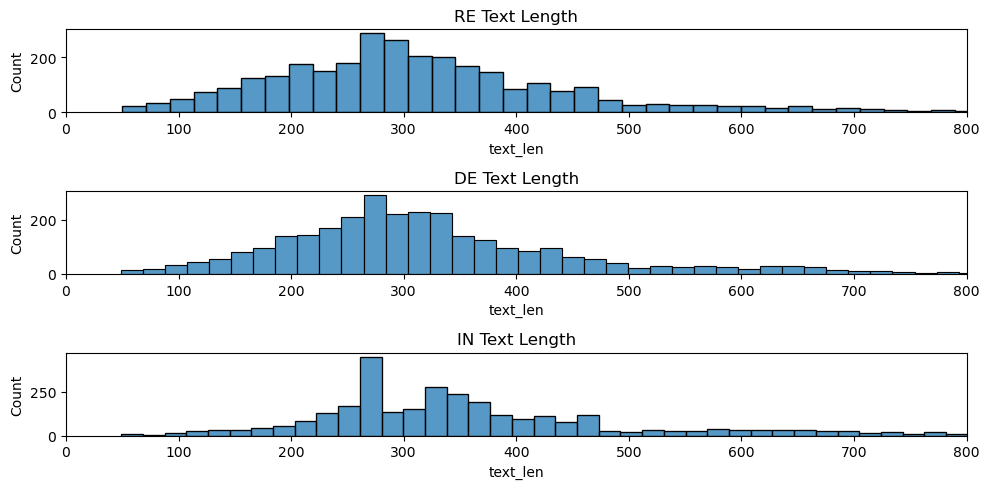

In [77]:
###' ################################################################################
###'
###' VISUALIZATION TEXT FEATURES
###' by. party
###'
###'

### 1. compare text len

# set locate
fig, axs = plt.subplots(3, figsize=(10, 5))

# 1st graph
sns.histplot(RE_tweets_part, x="text_len", ax=axs[0])
axs[0].set_title('RE Text Length')
axs[0].set_xlim([0, 800])

# 2nd graph
sns.histplot(DE_tweets_part, x="text_len", ax=axs[1])
axs[1].set_title('DE Text Length')
axs[1].set_xlim([0, 800])

# 3rd graph
sns.histplot(IN_tweets_part, x="text_len", ax=axs[2])
axs[2].set_title('IN Text Length')
axs[2].set_xlim([0, 800])

# show graph
plt.tight_layout()
plt.show()

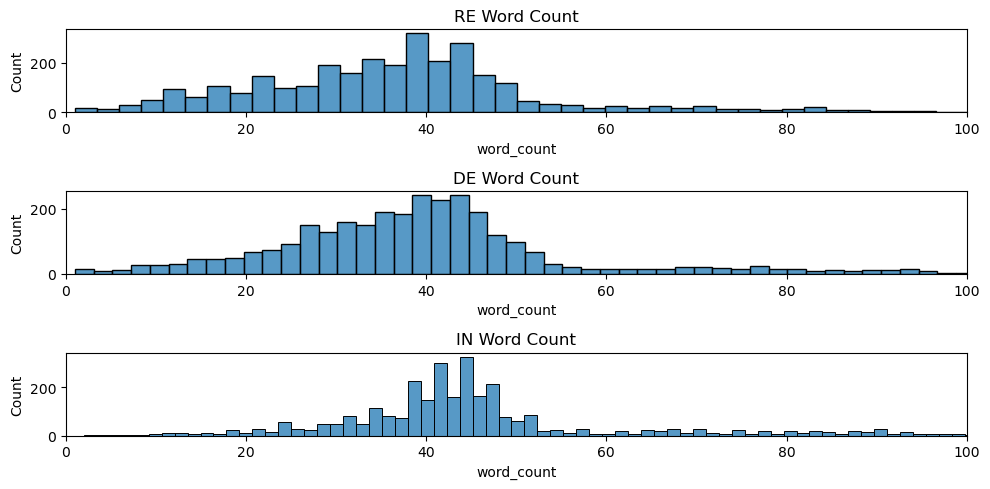

In [78]:
### 2. compare word count

# set locate
fig, axs = plt.subplots(3, figsize=(10, 5))

# 1st graph
sns.histplot(RE_tweets_part, x="word_count", ax=axs[0])
axs[0].set_title('RE Word Count')
axs[0].set_xlim([0, 100])

# 2nd graph
sns.histplot(DE_tweets_part, x="word_count", ax=axs[1])
axs[1].set_title('DE Word Count')
axs[1].set_xlim([0, 100])

# 3rd graph
sns.histplot(IN_tweets_part, x="word_count", ax=axs[2])
axs[2].set_title('IN Word Count')
axs[2].set_xlim([0, 100])

# show graph
plt.tight_layout()
plt.show()

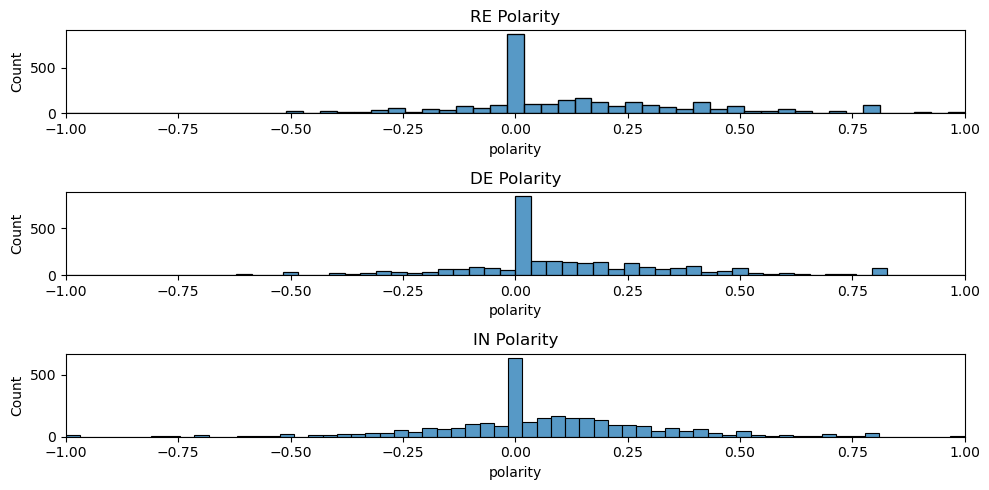

In [79]:
### 3. compare polarity

# set locate
fig, axs = plt.subplots(3, figsize=(10, 5))

# 1st graph
sns.histplot(RE_tweets_part, x="polarity", ax=axs[0])
axs[0].set_title('RE Polarity')
axs[0].set_xlim([-1, 1])

# 2nd graph
sns.histplot(DE_tweets_part, x="polarity", ax=axs[1])
axs[1].set_title('DE Polarity')
axs[1].set_xlim([-1, 1])

# 3rd graph
sns.histplot(IN_tweets_part, x="polarity", ax=axs[2])
axs[2].set_title('IN Polarity')
axs[2].set_xlim([-1, 1])

# show graph
plt.tight_layout()
plt.show()

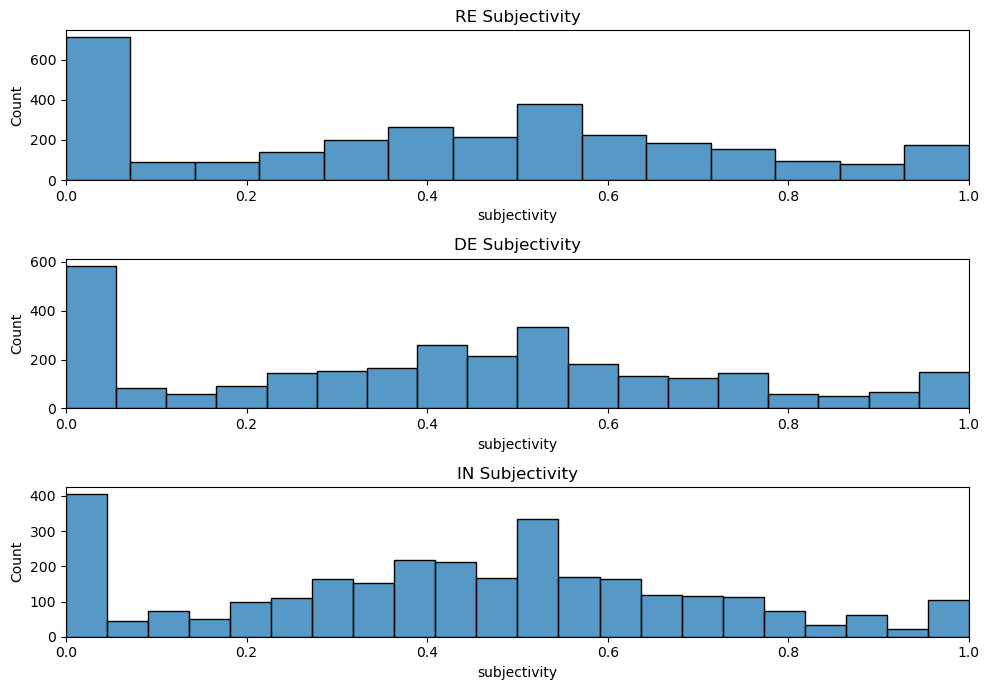

In [80]:
### 4. compare subjectivity

# set locate
fig, axs = plt.subplots(3, figsize=(10, 7))

# 1st graph
sns.histplot(RE_tweets_part, x="subjectivity", ax=axs[0])
axs[0].set_title('RE Subjectivity')
axs[0].set_xlim([0, 1])

# 2nd graph
sns.histplot(DE_tweets_part, x="subjectivity", ax=axs[1])
axs[1].set_title('DE Subjectivity')
axs[1].set_xlim([0, 1])

# 3rd graph
sns.histplot(IN_tweets_part, x="subjectivity", ax=axs[2])
axs[2].set_title('IN Subjectivity')
axs[2].set_xlim([0, 1])

# show graph
plt.tight_layout()
plt.show()

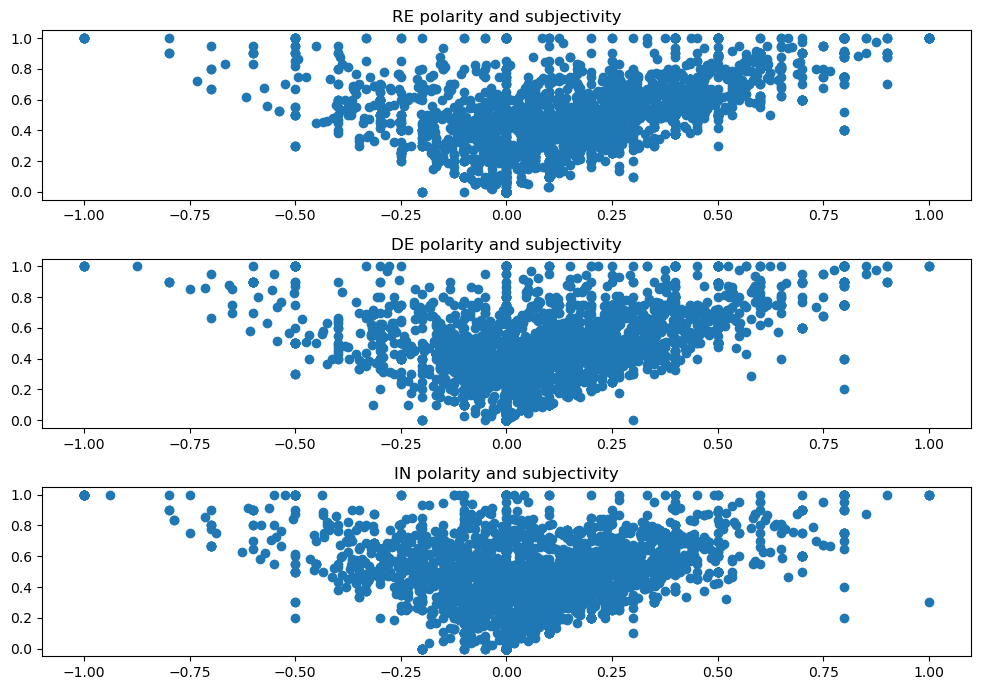

In [81]:
### 5. compare scatter plot of polarity and subjectivity

# set locate
fig, axs = plt.subplots(3, figsize=(10, 7))

# 1st graph
plt.subplot(3, 1, 1)
plt.scatter(RE_tweets_part['polarity'], RE_tweets_part['subjectivity'])
plt.title('RE polarity and subjectivity')

# 2nd graph
plt.subplot(3, 1, 2)
plt.scatter(DE_tweets_part['polarity'], DE_tweets_part['subjectivity'])
plt.title('DE polarity and subjectivity')

# 3rd graph
plt.subplot(3, 1, 3)
plt.scatter(IN_tweets_part['polarity'], IN_tweets_part['subjectivity'])
plt.title('IN polarity and subjectivity')

# show graph
plt.tight_layout()
plt.show()

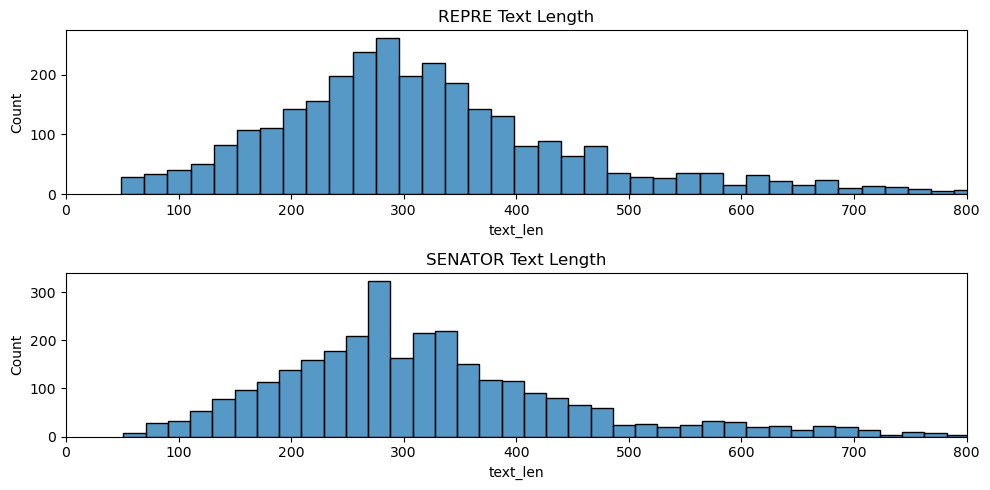

In [82]:
###' ################################################################################
###'
###' VISUALIZATION TEXT FEATURES
###' by. position
###'
###'

### 1. compare text len

# set locate
fig, axs = plt.subplots(2, figsize=(10, 5))

# 1st graph
sns.histplot(REP_tweets_part, x="text_len", ax=axs[0])
axs[0].set_title('REPRE Text Length')
axs[0].set_xlim([0, 800])

# 2nd graph
sns.histplot(SEN_tweets_part, x="text_len", ax=axs[1])
axs[1].set_title('SENATOR Text Length')
axs[1].set_xlim([0, 800])

# show graph
plt.tight_layout()
plt.show()

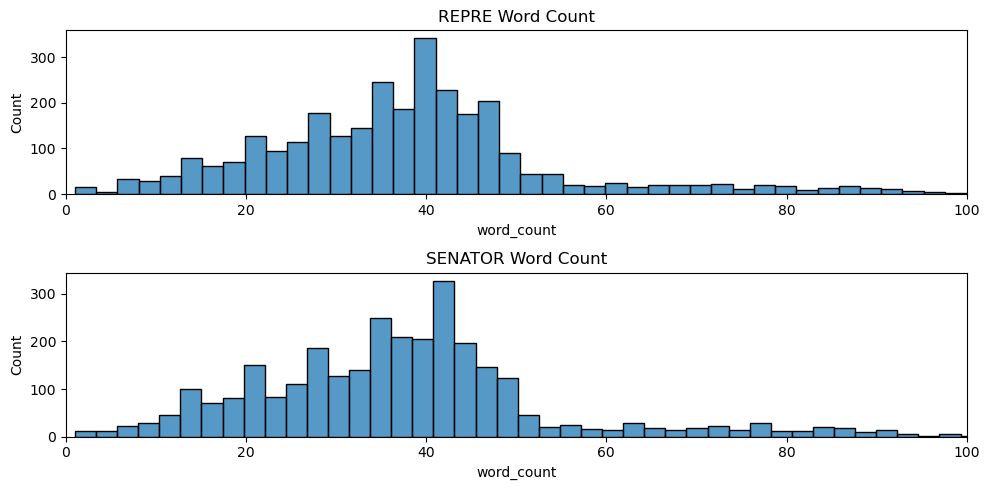

In [83]:
### 2. compare word count

# set locate
fig, axs = plt.subplots(2, figsize=(10, 5))

# 1st graph
sns.histplot(REP_tweets_part, x="word_count", ax=axs[0])
axs[0].set_title('REPRE Word Count')
axs[0].set_xlim([0, 100])

# 2nd graph
sns.histplot(SEN_tweets_part, x="word_count", ax=axs[1])
axs[1].set_title('SENATOR Word Count')
axs[1].set_xlim([0, 100])

# show graph
plt.tight_layout()
plt.show()

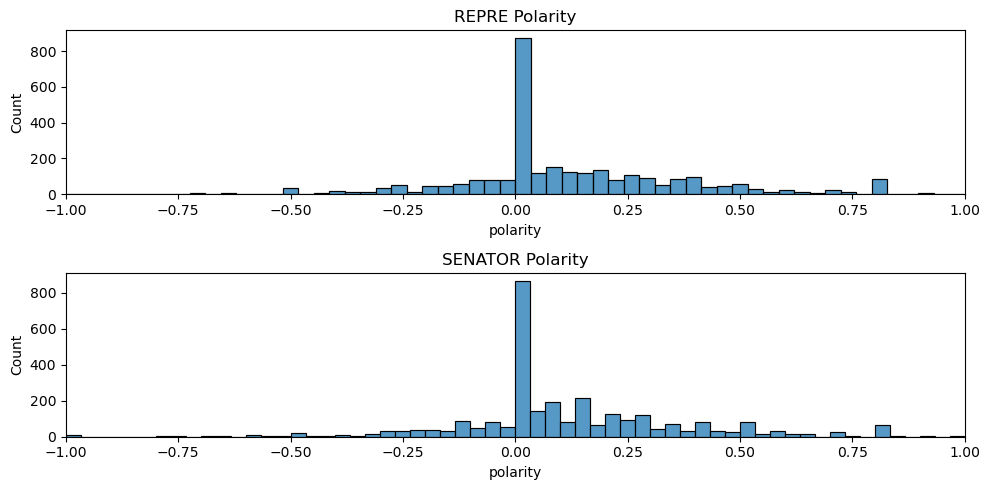

In [84]:
### 3. compare polarity

# set locate
fig, axs = plt.subplots(2, figsize=(10, 5))

# 1st graph
sns.histplot(REP_tweets_part, x="polarity", ax=axs[0])
axs[0].set_title('REPRE Polarity')
axs[0].set_xlim([-1, 1])

# 2nd graph
sns.histplot(SEN_tweets_part, x="polarity", ax=axs[1])
axs[1].set_title('SENATOR Polarity')
axs[1].set_xlim([-1, 1])

# show graph
plt.tight_layout()
plt.show()

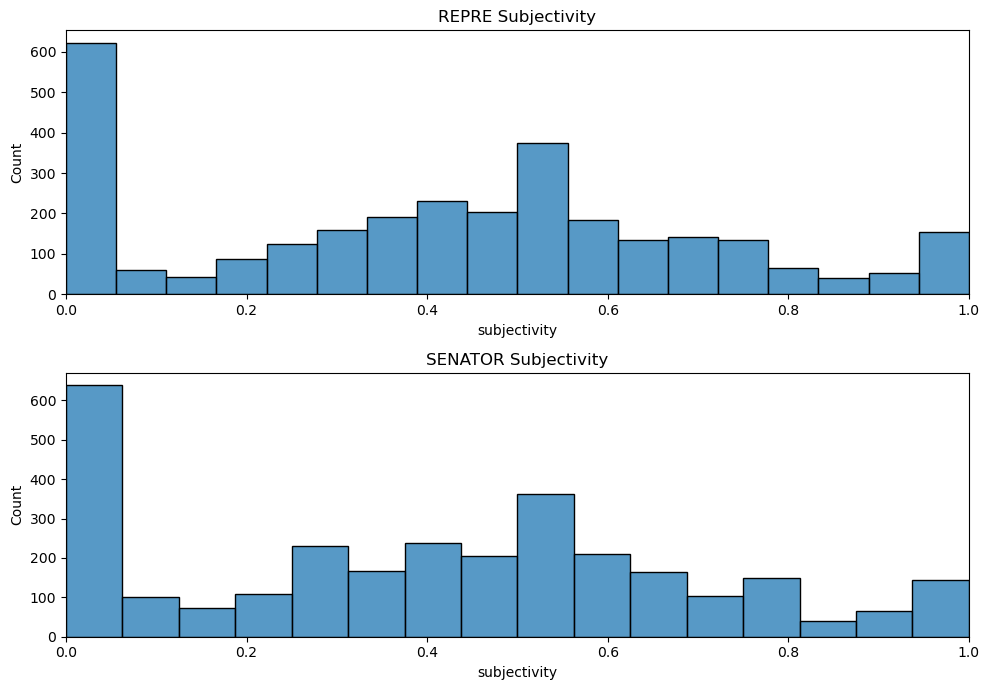

In [85]:
### 4. compare subjectivity

# set locate
fig, axs = plt.subplots(2, figsize=(10, 7))

# 1st graph
sns.histplot(REP_tweets_part, x="subjectivity", ax=axs[0])
axs[0].set_title('REPRE Subjectivity')
axs[0].set_xlim([0, 1])

# 2nd graph
sns.histplot(SEN_tweets_part, x="subjectivity", ax=axs[1])
axs[1].set_title('SENATOR Subjectivity')
axs[1].set_xlim([0, 1])

# show graph
plt.tight_layout()
plt.show()

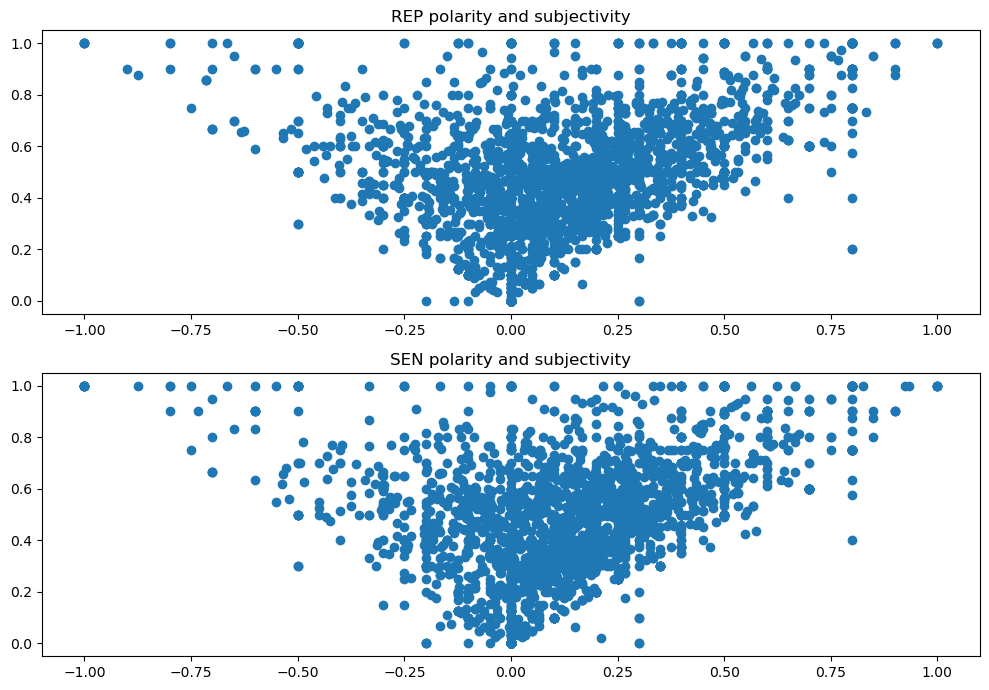

In [86]:
### 5. compare scatter plot of polarity and subjectivity

# set locate
fig, axs = plt.subplots(3, figsize=(10, 7))

# 1st graph
plt.subplot(2, 1, 1)
plt.scatter(REP_tweets_part['polarity'], REP_tweets_part['subjectivity'])
plt.title('REP polarity and subjectivity')

# 2nd graph
plt.subplot(2, 1, 2)
plt.scatter(SEN_tweets_part['polarity'], SEN_tweets_part['subjectivity'])
plt.title('SEN polarity and subjectivity')

# show graph
plt.tight_layout()
plt.show()

In [87]:
congress_tweets_part['tokens_join'] = congress_tweets_part['tokens'].map(lambda text: ' '.join(text) if isinstance(text, list) else "")
congress_tweets_part.head()

,tweet_id,party,position,gender,age,text,text_spell,tokens,tokens_join
0,1.207020e+18,Democrat,Rep,M,33,RT @almondalliance .@RepJoshHarder Secures $14...,RT @almondalliance .@RepJoshHarder Secures $14...,"[almondalliance, RepJoshHarder, Secures, 14, m...",almondalliance RepJoshHarder Secures 14 millio...
1,1.319010e+18,Democrat,Rep,F,60,Extreme droughts are getting worse.\nWe must a...,Extreme droughts are getting worse.\nWe must a...,"[extreme, drought, bad, act, quickly, renew, e...",extreme drought bad act quickly renew economy ...
2,1.225590e+18,Republican,Rep,M,66,Another terrorist is gone! https://twitter.com...,Another terrorist is gone! https://twitter.com...,"[terrorist, WhiteHouse, direction, President, ...",terrorist WhiteHouse direction President Trump...
3,1.327010e+18,Democrat,Rep,M,57,[2/2] ...will lay the ground work for lasting ...,[2/2] ...will lay the ground work for lasting ...,"[22, lay, ground, work, peace, stability, peop...",22 lay ground work peace stability people Arts...
4,1.335050e+18,Democrat,Sen,M,73,Today is a great day — not just for our DREAMe...,Today is a great day — not just for our DREAMe...,"[great, —, dreamer, community, Delaware, count...",great — dreamer community Delaware country dre...


In [88]:
###' ################################################################################
###'
###' VISUALIZATION : SCATTER TEXT
###'
###'

congress_tweets_part_S = congress_tweets_part[:300].dropna()

### create measure of subjectivity
corpus = st.CorpusFromPandas(congress_tweets_part,
                             category_col='position',
                             text_col='tokens_join',
                             nlp=nlp).build()
### create html document
html = st.produce_scattertext_explorer(corpus,
                                       category='Rep',
                                       category_name='Rep',
                                       not_category_name='Sen',
                                       width_in_pixels=1000,
                                       minimum_term_frequency=5
                                       #metadata=congress_tweets_part
                                      )

### save as html
open("Project5_Part1_ScatterText.html", 'wb').write(html.encode('utf-8'))

1515772